B-spline Regression

Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


Importing dataset

In [ ]:
dataset = pd.read_csv("HousingData.csv")
print(dataset.shape)

(506, 14)


In [ ]:
print(dataset)

        CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273     21.0  391.99    NaN  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [ ]:
print(dataset.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
dataset.rename(columns={"MEDV" : "PRICE"},inplace=True)
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN   36.2

[5 rows x 14 columns]


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


Null Values Heatmap

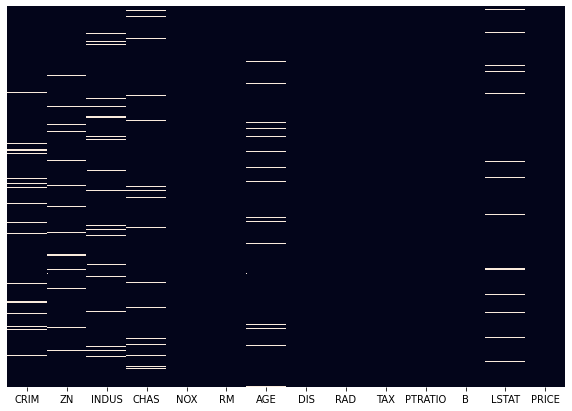

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [ ]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,-1]

Replacing missing values with mean

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X.iloc[:, 0:13])
X.iloc[:, 0:13] = imputer.transform(X.iloc[:, 0:13])

Here all the missing value are replace with mean value of the column as can be seen in the heatmap below

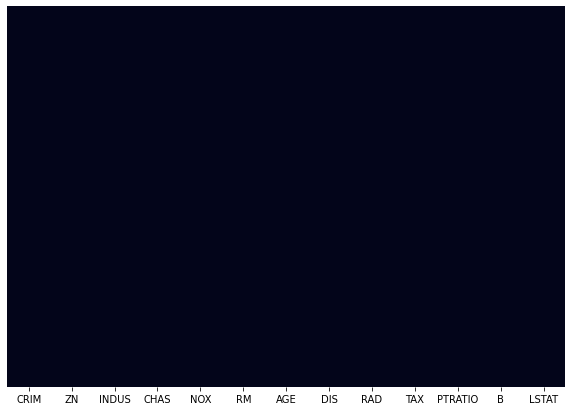

In [ ]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False)

In [ ]:
print(X.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


Analysis of the data

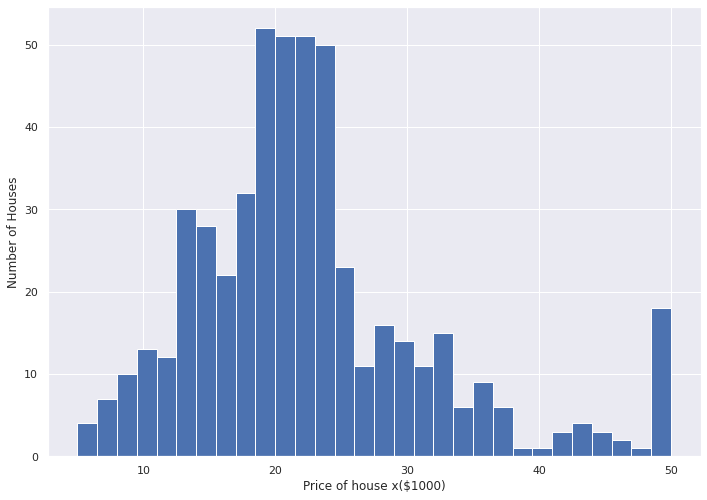

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y,bins= 30)
plt.xlabel("Price of house x($1000)")
plt.ylabel("Number of Houses")
plt.show()

[]

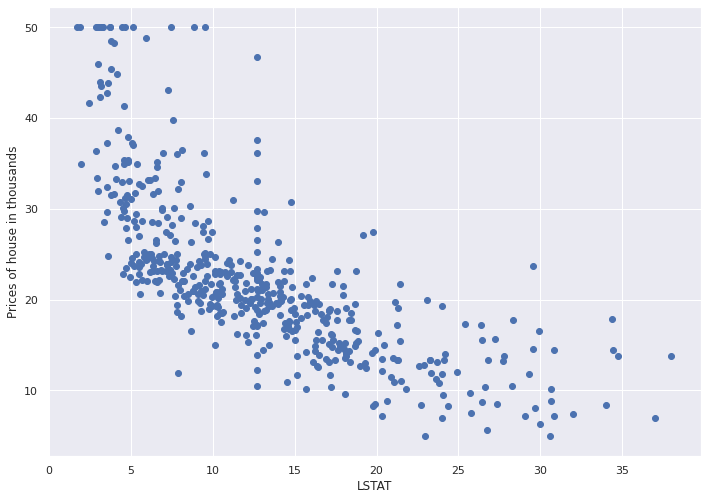

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.scatter(X['LSTAT'],y,marker='o')
plt.xlabel("LSTAT")
plt.ylabel("Prices of house in thousands")
plt.plot()

[]

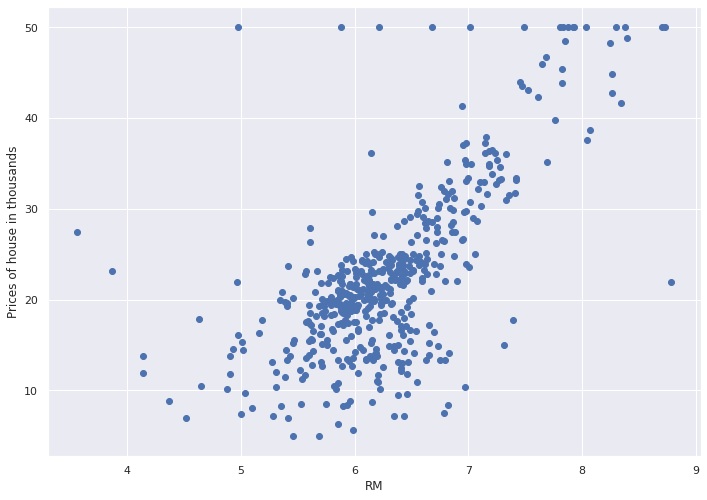

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.scatter(X.RM,y,marker='o')
plt.xlabel('RM')
plt.ylabel("Prices of house in thousands")
plt.plot()

[]

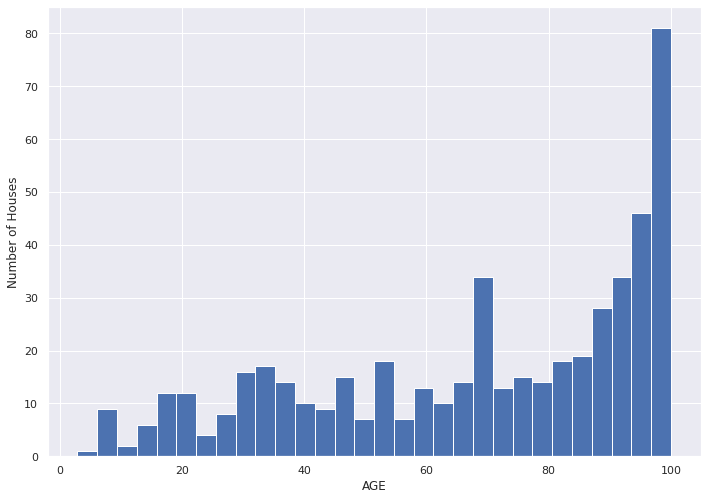

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(X.AGE,bins= 30)
plt.xlabel("AGE")
plt.ylabel("Number of Houses")
plt.plot()

[]

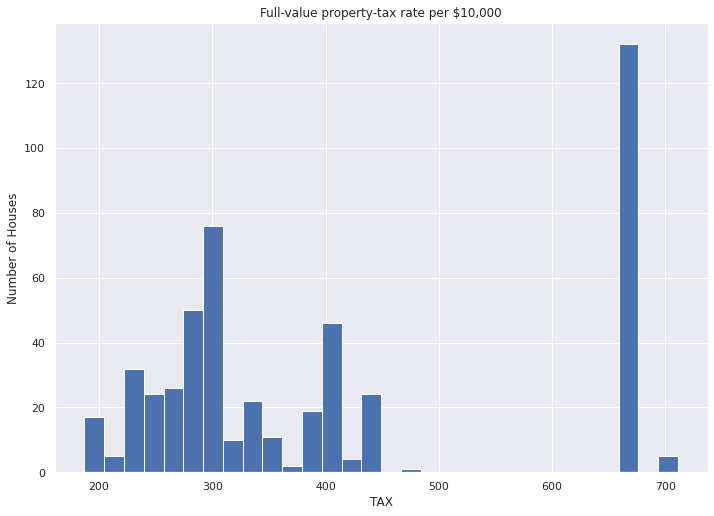

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(X.TAX,bins= 30)
plt.title("Full-value property-tax rate per $10,000")
plt.xlabel("TAX")
plt.ylabel("Number of Houses")
plt.plot()

Splitting training and test data

In [ ]:
data_X = X.RM
X_train,X_test,y_train,y_test= train_test_split(data_X,y,test_size=0.20, random_state = 0)

In [ ]:
from patsy import dmatrix
import statsmodels.formula.api as smf

Fitting the model with B-Spline with 5 uniform knots and equation of degree 3

In [ ]:
X_spline = dmatrix('bs(x,df = 5, degree = 3, include_intercept = False)', {'x': X_train},return_type = 'dataframe')
spline_fit = sm.GLM(y_train,X_spline).fit()

Getting Training set error

In [ ]:
y_pred_train = spline_fit.predict(dmatrix('bs(test, df = 5, degree = 3, include_intercept = False)', {'test': X_train},return_type = 'dataframe'))
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse_train)

5.773431763317879


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.608514706214529

Getting Test set error

In [ ]:
y_pred = spline_fit.predict(dmatrix('bs(test, df = 5, degree = 3, include_intercept = False)', {'test': X_test},return_type = 'dataframe'))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_test)

6.3324339441508135


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5075465019469314

Comparison of Real And Predicted prices of Training set.

In [ ]:
comparison = pd.concat([X_train,y_train,y_pred_train],axis=1)
comparison.columns = ['Average no. of Rooms','Real Prices($1000)','Predicted Prices($1000)']
print(comparison)

     Average no. of Rooms  Real Prices($1000)  Predicted Prices($1000)
220                 6.951                26.7                28.862986
71                  5.961                21.7                18.177517
240                 6.897                22.0                27.992263
6                   6.012                22.9                18.455223
417                 5.304                10.4                16.412158
..                    ...                 ...                      ...
323                 5.708                18.5                17.237937
192                 7.178                36.4                32.757492
117                 6.021                19.2                18.507306
47                  6.030                16.6                18.560311
172                 5.572                23.1                17.026696

[404 rows x 3 columns]


Comparison of  Real and Predicted Prices of Test Set.

In [ ]:
comparison = pd.concat([X_test,y_test,y_pred],axis=1)
comparison.columns = ['Average no. of Rooms','Real Prices($1000)','Predicted Prices($1000)']
print(comparison)

     Average no. of Rooms  Real Prices($1000)  Predicted Prices($1000)
329                 6.333                22.6                20.883264
371                 6.216                50.0                19.862334
219                 6.373                23.0                21.268068
403                 5.349                 8.3                16.504663
78                  6.232                21.2                19.992744
..                    ...                 ...                      ...
56                  6.383                24.7                21.367117
455                 6.525                14.1                22.896545
60                  5.741                18.7                17.319141
213                 6.375                28.1                21.287786
108                 6.474                19.8                22.320810

[102 rows x 3 columns]


Creating linspaces to make predictions and plot graph.

In [ ]:
range_pred = np.linspace(np.min(X_train),np.max(X_train),50)
prediction = spline_fit.predict(dmatrix('bs(xp, df = 5, degree = 3,include_intercept = False)', {'xp': range_pred},return_type = 'dataframe'))

Plotting Graph to see how our model fit to the data.

[]

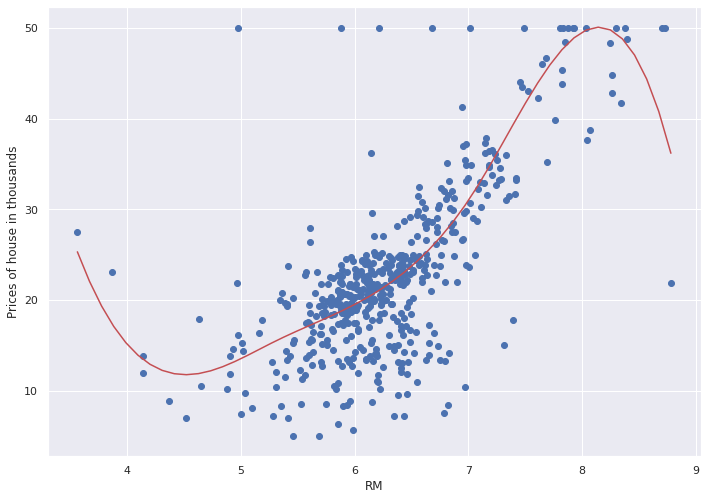

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.scatter(X.RM,y,marker='o')
plt.plot(range_pred, prediction, color='r', label='Specifying degree =3 with 5 knots')
plt.xlabel('RM')
plt.ylabel("Prices of house in thousands")
plt.plot()